1. Exercice 1 :
• Donner une explication th´eorique des fonctions d’activation classiques : Sigmoid, Tanh, ReLU, Leaky ReLU, et SiLU.
• Expliquer les avantages et inconv´enients de chaque fonction dans des
architectures de r´eseaux de neurones.

Ces fonctions sont dites non linéaires. Elles permettent de "casser" la linéarité entre deux couches de réseaux de neurones.

Sigmoid: Avantages: Elle est dérivable et dérivée et continue.
Inconvénients: Elle entraîne des problèmes de vanishing gradient où les gradients deviennent très petits ou très grands, ce qui ralentit l'apprentissage.

Tan hyperbolique: Avantages: Elle est dérivable ; elle centre autour de zéro les valeurs de sortie.
Inconvénients: Elle entraîne des problèmes de vanishing gradient où les gradients deviennent très petits ou très grands.

ReLU: Avantages: Elle est non bornée et est plus rapide à calculer que les autres fonctions d'activation.
Inconvénients: Elle a des problèmes d'entrée négatives qui "désactive" des neurones.

leaky ReLU: Avantages: Elle est non bornée et est plus rapide à calculer que les autres fonctions d'activation.
Inconvénients: Elle tente de régler les problèmes d'entrée négatives qui "désactive" des neurones en introduisant une pente si x<0. Sa dérivée n'est pas définie en x=0.

SiLU: Avantages: Elle est dérivable et permet de rééchelonner car elle est une sigmoide multipliée par la sortie.
Inconvénients: Elle est plus lente à calculer que les autres fonctions d'activation.

2. Exercice 2 :
• Soit une architecture simple de r´eseau de neurones. Choisir la fonction d’activation appropri´ee en fonction de l’objectif (classification
binaire, multi-classes, etc.).
• Justifier votre choix.

classification binaire: sigmoid
classification multi-classes: softmax
regression: reLU

La classification binaire nécessite une fonction d’activation sigmoid car elle permet de ramener les valeurs autour de 0.5 ce qui permet de définir 0.5 comme threshold.
La classification multi-classes nécessite une fonction d’activation softmax car elle permet d'assigner une probabilité à chaque classe puisque la somme vaut 1 et qu'elle génère des valeurs entre 0 et 1.
La régression nécessite une fonction d’activation reLU car elle permet de générer des valeurs positives.



3. Exercice 3 :
• Etudier le ph´enom`ene de saturation des fonctions Sigmoid et Tanh. ´
• Expliquer comment ces saturations peuvent mener au probl`eme de
vanishing gradients.

Le phénomène de saturation survient lorsque la sortie des neurones est trop grande ou trop petite, autrement dit dans une zone de saturation(zone où la fonction est plate), ce qui entraîne une dérivée quasi-nulle voire nulle. Le modèle apprend donc plus lentement voire arrête d'apprendre, ce que l'on appelle vanishing gradient puisque l'apprentissage se fait par rétropropagation du gradient.

4. Exercice 4 :
• D´efinir et expliquer les concepts de vanishing et exploding gradients.
• Donner des cas th´eoriques o`u ces probl`emes apparaissent.
On a vu à l'exercice précédent ce qu'est le vanishing gradient.
L'exploding gradient peut survenir lorsque les poids sont trop grands lorsqu'une fonction d'activation n'est pas bornée comme ReLU ou SiLU. La chain rule peut alors donner des valeurs très grandes.

Par exemple, si l'on prend un cas théorique où l'on a beaucoup de couches n de neurones, et que l'on a une fonction d'activation non bornée, le gradient peut devenir infinitésimal dans le cas du vanishing gradient ou plus grave encore dans le cas de l'exploding gradient lorsque les poids sont trop grands et arrête le programme lorsque la valeur limite du float32 est atteinte.

5. Exercice 5 :
• Calculer les gradients pour un r´eseau de neurones simple (4 couches)
avec des fonctions Sigmoid et ReLU.
• Observer le comportement des gradients lorsque le r´eseau est profond
(simuler 10 couches).

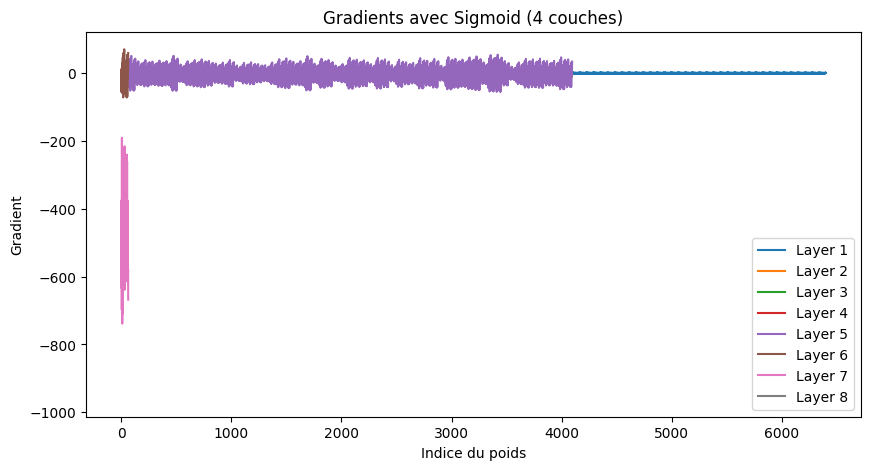

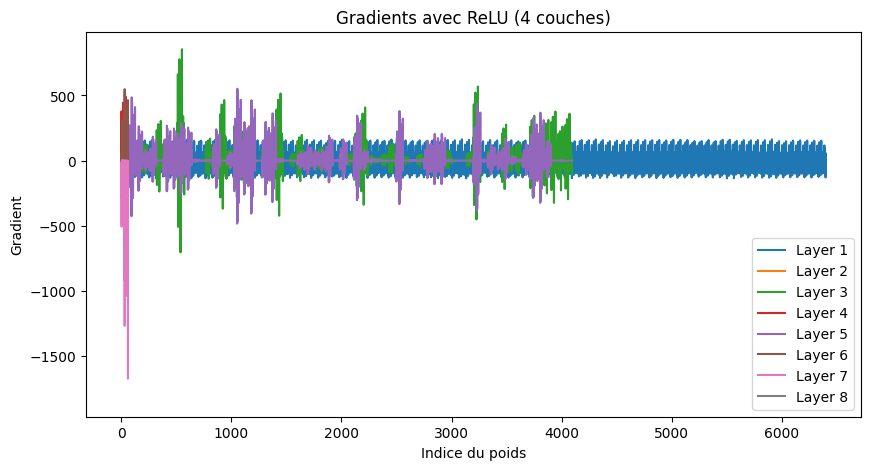

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt

def model(activation_function):
    model = Sequential()
    model.add(Dense(64, input_shape=(100,), activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    return model
def gradients(model, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = tf.keras.losses.mean_squared_error(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    return gradients

# Générer des données fictives
x = np.random.rand(1000, 100).astype(np.float32)
y = np.random.rand(1000, 1).astype(np.float32)

# Construire et compiler les modèles
model_sigmoid = model('sigmoid')
model_relu = model('relu')

# Calculer les gradients
gradients_sigmoid = gradients(model_sigmoid, x, y)
gradients_relu = gradients(model_relu, x, y)

# Afficher les gradients
def plot_gradients(gradients, title):
    plt.figure(figsize=(10, 5))
    for i, gradient in enumerate(gradients):
        plt.plot(gradient.numpy().flatten(), label=f'Layer {i+1}')
    plt.title(title)
    plt.xlabel('Indice du poids')
    plt.ylabel('Gradient')
    plt.legend()
    plt.show()

plot_gradients(gradients_sigmoid, 'Gradients avec Sigmoid (4 couches)')
plot_gradients(gradients_relu, 'Gradients avec ReLU (4 couches)')

On constate dans les deux cas des exploding gradients dans le positif comme dans le négatif pour les couches 7 et 6 et pour les couches 3 et 5 mais surtout 4, 6 et 7.

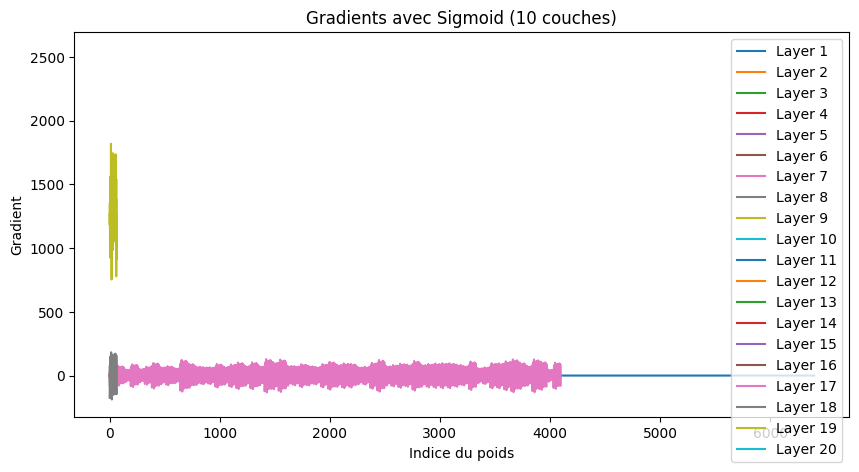

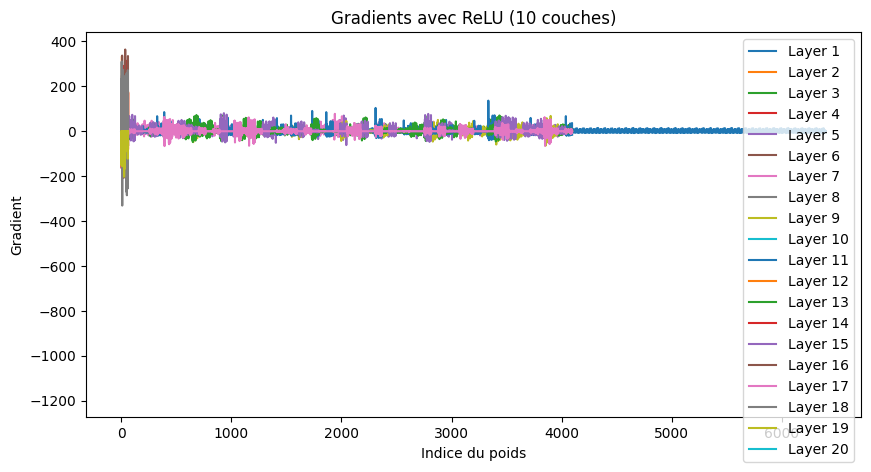

In [28]:
def deep_model(activation_function):
    model = Sequential()
    model.add(Dense(64, input_shape=(100,), activation=activation_function))
    for _ in range(8):
        model.add(Dense(64, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    return model

# Construire et compiler les modèles
deep_model_sigmoid = deep_model('sigmoid')
deep_model_relu = deep_model('relu')

# Calculer les gradients
deep_gradients_sigmoid = gradients(deep_model_sigmoid, x, y)
deep_gradients_relu = gradients(deep_model_relu, x, y)

# Afficher les gradients
plot_gradients(deep_gradients_sigmoid, 'Gradients avec Sigmoid (10 couches)')
plot_gradients(deep_gradients_relu, 'Gradients avec ReLU (10 couches)')

On constate dans les deux cas des exploding gradients dans le positif comme dans le négatif pour la couche 9 et pour les couches 16, 18 et 19 respectivement. La couche 1 connait un vanishing gradient car sa courbe est à 0 constamment. Ceci montre que la couche 1 n'apprend plus alors que les dernières couches ont tendance à apprendre n'importe quelle valeur.

6. Exercice 6 :
• Proposer des solutions pour ´eviter les probl`emes de gradients (initialisation des poids, normalisation, couches r´esiduelles).
• Discuter des avantages et inconv´enients de chaque m´ethode.


Le Batch normalization normalise les activations de chaque mini-batch afin d'aider à stabiliser et accélérer l'entraînement.
Elle présente l'inconvénient d'être plus longue à entraîner.
La méthode d'initialisation des poids permet de réduire les problèmes de vanishing gradient. Il faut cependant connaître les distributions statistiques et peut ne pas suffire si le réseau a beaucoup de couches.